# **Logbook es. 09**

## **Introduzione**

Con questa esperienza si vuole lavorare sulla logica sequenziale, in particolare operando sui flip flop e registri a scorrimento, i quali verrano infine utilizzati per assemblare un generatore di numeri pseudocasuali sul quale ci si concentrerà per studiarne il periodo di generazione.


## Task 1 — HEF4013: piedinatura e funzioni dei pin
**Obiettivi**
- Identificare e descrivere tutti i pin del CD4013 (due D flip‑flop);
- Definire la configurazione "normale" di SET e RESET (nessun ingresso flottante).

<img src="piedinatura_HEF4013.png" alt="piedinatura HEF4013" width="600"/>

*Figura 1: Piedinatura del circuito integrato CD4013, contenente due flip‑flop D (pag. 3 del datasheet)*

Il CD4013 possiede due ingressi speciali, **SET** e **RESET**, detti *asincroni* perché agiscono indipendentemente dal clock.  
Questo significa che, quando uno di essi viene attivato, il flip-flop cambia stato subito, senza aspettare un fronte di salita del segnale di clock.

Il loro comportamento è il seguente:

| SET | RESET | Azione sul flip-flop | Spiegazione |
|:---:|:---:|:------------------------|:-------------|
| 0 | 0 | Funzionamento normale | Il flip-flop copia l’ingresso **D → Q** solo al fronte di salita del clock. |
| 1 | 0 | Forzatura di **Q = 1** | Il flip-flop viene “settato” immediatamente, indipendentemente da D e CLK. |
| 0 | 1 | Forzatura di **Q = 0** | Il flip-flop viene “resettato” immediatamente, indipendentemente da D e CLK. |
| 1 | 1 | Stato proibito | Entrambe le uscite (**Q** e **Q̅**) diventano alte e il circuito perde coerenza. |

Conclusione:
- Per il funzionamento normale del flip-flop (come divisore o registro), entrambi **SET** e **RESET devono essere tenuti a livello logico basso (0 V)**.  
- Questo evita attivazioni indesiderate e garantisce che il dispositivo risponda solo ai fronti di clock.  
- Lasciare questi pin “flottanti” porta a comportamenti casuali, perché il chip potrebbe interpretarli come 0 o 1 a seconda del rumore elettrico.

## Task 2 — Divisore di frequenza /2 con HEF4013
**Obiettivi**
- Realizzare il divisore di frequenza per due e collegare l’ingresso CLK ad un segnale di clock realizzato generando un’onda quadra sul canale W1, compresa tra 0 e 5 V, di frequenza a piacere;
- Misurare sia il clock che l’uscita del circuito tramite Ch1 e Ch2, dimostrando la corretta operazione del divisore;
- Annotare la configurazione utilizzata.

<img src="schema_divisore2.png" alt="schema divisore HEF4013" width="400"/>

*Figura 2: Schema del divisore di frequenza per 2 con CD4013.*

<img src="circuito-divisore_realizzato.png" alt="circuito realizzato" width="400"/>

*Figura 3: Foto del circuito del divisore di frequenza per 2 realizzato su breadboard.*

Per procedere all'acquisizione dei segnali, abbiamo usato $\texttt{dac+adc.ipynb}$ con i seguenti parametri di acquisizione:

- Ampiezza W1: 2.5 V;
- Offset W1: 2.5 V; 
- Frequenza W1: 10 Hz;
- Alimentazione: 5 V.

e la configurazione normale riportata nel Task 1 (SET e RESET a 0 V).

Di seguito, il risultato ottenuto:

<img src="fmezzi_divider_task2_es09.png" Width = 500>

*Figura 4: Ch1 e Ch2 del divisore di frequenza per 2.*

Concludiamo dunque la coerenza con la teoria.

### **Task 3**

<img src="schema_divisore_freq_task3.png" alt="schema divisore frequenza con 2 flip flop" width="400"/>

*Figura 5: Schema di un divisore in frequenza costruito utilizzando 2 flip flop.*

Obiettivi:

1. Ricostruire tabella di verità e diagramma di stato del circuito riportato sopra.

2. Descrivere l'evoluzione temporale di ognuna delle 4 configurazioni possibili del circuito (00, 01, 10, 11), dopo un ciclo di CLOCK.

3. Tracciare il diagramma temporale atteso includendo tutti i segnali rilevanti del circuito.


Inizio notando che il segnale di clock è il medesimo per entrambe i flip-flop, quindi il circuito è sincrono; procedo poi riportando la tabella di verità del circuito:

| Stato n | $IN = \overline{Q_1^n \cdot Q_2^n}$ | Stato n+1 | $OUT = Q_2^{n+1}$ |
|:---:|:---:|:---:|:---:|
| 00 | 1 | 10 | 0 |
| 10 | 1 | 11 | 1 |
| 01 | 1 | 10 | 0 |
| 11 | 0 | 01 | 1 |

Il modo in cui il circuito opera è il seguente: quando il segnale di clock sale il bit memorizzato nel primo flip-flop viene sovrascritto dal bit in uscita dal NAND dato dal NAND dei due vecchi bit memorizzati nello stato n del circuito. Contemporaneamente, il bit nel primo flip-flop passa al secondo che viene sovrascritto e quindi perso definitivamente. Lo stato finale è quindi dato dal bit ottenuto operando un NAND sui due precedenti e dal vecchio immagazzinato nel flip-flop, che passa al secondo.

Lo schema di stato riportato sopra mostra come il circuito trasformi lo stato 00 in 10, 10 in 11, 11 in 01 ed infine 01 in 10, senza mai tornare allo stato 00.

Di seguito si riporta un diagramma temporale del circuito dove si viasualizza l'uscita $Q_2$ ed il segnale di clock:

<img src="freq_divider_terzi_sim.png" alt="simulazione divisore f/3" width="800"/>

*Figura 6: Simulazione del diagramma temporale del circuito in esame (assumendo che esso non assuma lo stato 00). Notare il duty cycle dell'output pari a 66.6%*

Si vede dalla simulazione sopra che il circuito si comporta come un divisore in frequenza, in particolare l'output ha frequenza pari ad un terzo della frequenza del segnale di clock, mi aspetto di ritrovare tale comportamento nell'osservazione sperimentale del circuito.


* PER TASK 1-4: configurazione usata dal chip SET = RESET = 0 per avere una configurazione di "HOLD".


### **Task 4**

Obiettivo:

1. Realizzare il circuito usando uno dei NAND dell’integrato CD4011 e verificare sperimentalmente la correttezza del diagramma temporale ricavato nel precedente esercizio.

2.  Riassumere i risultati in una misura Divisori.pdf in cui mostrare l’evoluzione temporale del clock e dell’uscita dei due divisori di frequenza.

Il CA4013 è stato mantenuto nella stessa configurazione dei canali SET e RESET, quella utilizzata nel task 2. Doi seguito l'immagine del circuito costruito in lab:

<img src="circuito_task4_lab.jpg" alt="divisore in frequenza terzi in lab" width="400"/>

*Figura 7: Circuito divisore in frequenza del task 3 montato in lab.*

Si sono misurati clock ed output in contemporanea ottenendo la seguente acquisizione:

<img src="fterzi_divider_task4_es09.png" alt="misura uscita divisore in frequenza" width="800"/>

*Figura 8: Misura di segnale di clock ed uscita del divisore in lab. Sono state utilizzate alimentazioni a 0 V e 5 V, in accordo con le specifiche del CA4013 utilizzato.*

Come si vede è i perfetto accordo con la simulazione riportata al task precedente.

## Task 5 — MC14557: registro a scorrimento a lunghezza variabile
**Obiettivi**
- Identificare pin, piedinatura e modalità di configurazione della lunghezza **n** (selettori Lx).
- Spiegare in ≤2 frasi il principio di funzionamento del dispositivo.

<img src="piedinatura_MC14557.png" alt="piedinatura MC14557" width="600"/>

*Figura 9: Piedinatura del circuito integrato MC14557 (pag. 3 del datasheet)*

### Significato dei pin principali

| Pin | Nome | Funzione |
|:---:|:------|:-----------|
| 1 | L2 | Selettore lunghezza (2 bit) |
| 2 | L1 | Selettore (1 bit) |
| 3 | RESET | Reset asincrono |
| 4 | CLOCK | Clock del registro |
| 5 | CE | Clock Enable (attivo basso) |
| 6 | B | Ingresso seriale B |
| 7 | A | Ingresso seriale A |
| 8 | VSS | Massa (0 V)|
| 9 | A/B SEL | Selettore ingresso A o B |
| 10 | Q | Uscita seriale |
| 11 | Q̅ | Uscita invertita |
| 12–15 | L32–L4 | Selettori di lunghezza (32, 16, 8, 4 bit) |
| 16 | VDD | Alimentazione (+5 V) |


### Interpretazione del diagramma logico (Fig. 1 – datasheet pag. 2)

<img src="logic_diagram.png" alt="diagramma a blocchi MC14557" width="600"/>

*Figura 10: Diagramma a blocchi del MC14557 (Fig. 1 del datasheet, pag. 2).*

Il diagramma mostra **sei blocchi di shift register** (da 1, 2, 4, 8, 16 e 32 bit) collegati in cascata tramite commutatori controllati dagli ingressi **L1, L2, L4, L8, L16, L32**.  
Quando un ingresso $L_n$ è a livello alto (= 1), quel blocco viene inserito nel percorso del registro; se basso, viene bypassato.

L’**ingresso seriale A/B** alimenta la prima cella, e ad ogni **fronte di salita del clock** il contenuto di ogni cella si sposta verso destra fino all’uscita **Q**, con possibilità di selezionare la lunghezza complessiva come:

$$n = 1 + (L1 + 2L2 + 4L4 + 8L8 + 16L16 + 32L32)$$

### **Task 6**

Obiettivo:

1. Collegare il registro di scorrimento ad Analog Discovery 2 e verificare quanto tempo un’onda quadra (W2) impiega a propagare dall’ingresso A all’uscita Q.

2. Misurare il ritardo fra Ch1 e Ch2 in configurazione n = 64, 48, 32 e 16 bit e verificare la consistenza con il periodo di clock scelto.

Si sono scelte le seguenti configurazioni per i pin del MC14557:

* RESET = 0.

* CE = 0.

* A/B = 1, in modo da selezionare l'ingresso A come input.

* I selettori di lunghezza sono stati collegati adoc per ogni configurazione del cip studiata.

<img src="valori_log_ingressi_MC_task6.png" alt="schema divisore frequenza con 2 flip flop" width="800"/>

*Figura 11: Tabelle logiche per le varie configurazioni in cui operare con il  MC14557.*

Si è scelto di collegare il segnale W2 a A/B, sulla base di quanto riportato nella prima e seconda riga della tabella di verità sulla sinistra: scegliendo A come ingresso, pongo A/B SELECT a 1, così che Q riproducesse A.

Al fine di configurare il registro con un dato numero di bit (64, 48, 32, 16), ci si è invece rifatti alla tabella sulla destra, dove sono riportate le configurazioni dei selettori di lunghezza del registro necessarie per avere un certo numero di bit.

Notare come, per avere un determinato numero di bit, bisogna imposatre i selettori di lunghezza in modo che formino un numero binario il cui valore corrispettivo in decimale è "numero di bit desiderato" - 1.

Nota: per generare i segnali di clock e di ingresso con W1 e W2 si è avuto cura di sincronizzare i due generatori come consigliato nella scheda:

wgen.w1.sync()

wgen.w2.start()

* CONFIGURAZIONE A 16 BIT.

<img src="reg_scorr_16bit.jpg" alt="config MC14557 16 bit" width="800"/>

*Figura 12: Registro a scorrimento con  MC14557 configurato a 16 bit. Le alimentazioni del chip sono le stesse utlizzate nel task 4 ed anche le loro posizioni sui rail sono rimaste invariate (unica eccezione: il rail tutto a sinistra è stato collegato con la massa, cioè alimentazione a 0 V, mentre il rail tutto a destra con l'alimentazione a 5 V), notare, infine, che il chip è ribaltato (sinistra -> destra, alto -> basso) rispetto a quanto riportato nel relativo datasheet.*

I segnali di ingresso ed uscita misurati sono riportati di seguito:

<img src="reg_scorr_16bit.png" alt="misura config 16 bit" width="800"/>

*Figura 13: Misura di ingresso ed uscita di registro a scorrimento configurato a 16 bit.*

Dall'immagine si misura uno sfasamento tra ingresso ed uscita di circa $\Delta t \simeq 0.080 s$

* CONFIGURAZIONE A 32 BIT.

<img src="reg_scorr_32bit.jpg" alt="config MC14557 32 bit" width="800"/>

*Figura 14: Registro a scorrimento con  MC14557 configurato a 32 bit.*

I segnali di ingresso ed uscita misurati sono riportati di seguito:

<img src="reg_scorr_32bit.png" alt="misura config 32 bit" width="800"/>

*Figura 15: Misura di ingresso ed uscita di registro a scorrimento configurato a 32 bit.*

Dall'immagine si misura uno sfasamento tra ingresso ed uscita di circa $\Delta t \simeq 0.040 s$

* CONFIGURAZIONE A 48 BIT.

<img src="reg_scorr_48bit.jpg" alt="config MC14557 48 bit" width="800"/>

*Figura 16: Registro a scorrimento con  MC14557 configurato a 48 bit.*

I segnali di ingresso ed uscita misurati sono riportati di seguito:

<img src="reg_scorr_48bit.png" alt="misura config 48 bit" width="800"/>

*Figura 17: Misura di ingresso ed uscita di registro a scorrimento configurato a 48 bit.*

Dall'immagine si misura uno sfasamento tra ingresso ed uscita di circa $\Delta t \simeq 0.040 s$

* CONFIGURAZIONE A 64 BIT.

<img src="reg_scorr_64bit.jpg" alt="config MC14557 64 bit" width="800"/>

*Figura 18: Registro a scorrimento con  MC14557 configurato a 64 bit.*

I segnali di ingresso ed uscita misurati sono riportati di seguito:

<img src="reg_scorr_64bit.png" alt="misura config 64 bit" width="800"/>

*Figura 19: Misura di ingresso ed uscita di registro a scorrimento configurato a 64 bit.*

Dall'immagine si misura uno sfasamento tra ingresso ed uscita di circa $\Delta t \simeq 0.080 s$

Per tutti i casi trattati sopra la frequenza del clock è stata impostata a 50 Hz, mentre quella di ingresso (e quindi anche uscita) a 5 Hz, il periodo del clock è quindi $1/50 \approx 0.02$ ed in effetti i delay misurati sono sempre un multiplo di 2 di 0.02, in accordo con il funzionamento del registro a scorrimento.

### **Task 7**

Obiettivo: Collegare l’uscita Q di MC14557 all’ingresso D di uno dei due flip-flop contenuti in CD4013, e realizzare un registro a (n + 1) bit. Collegare entrambe gli integrati al segnale CLK e verificare semplicemente se il segnale del W2 ora propaga fino all’uscita del flip-flop D, ossia che se A viene impostato ad un livello logico alto (basso) allora dopo qualche ciclo di clock l’uscita Q di CD4013 diventa alta (bassa).

<img src="circuito_task7.jpg" alt="registro a n+1 bit" width="800"/>

*Figura 20: Registro a scorrimento a 16 + 1 bit realizzato in lab.*

I segnali raccolti (mantenendo tutti gli altri parametri oltre ai selettori di lunghezza uguali al caso precedente) sono:

<img src="reg_scorr_16plus1bit_task7.png" alt="segnali osservati" width="800"/>

*Figura 21: Registro a scorrimento a 16 + 1 bit realizzato in lab.*

Si può vedere dall'immagine che il segnale è analogo a quelli raccolti nel task precedente con uno sfasamento pari ad un multiplo di 2 di 0.02 s, periodo del clock. Nel caso presente si misura uno sfasamento pari a circa $ \Delta t \simeq 0.080 s $

# Homework 1 – Sequenze di bit generate dal circuito pseudocasuale (MC14557 + CD4013)

## Obiettivi
- Calcolare teoricamente le sequenze di bit generate dal generatore del Task 8, per **n = 1 → 5**;  
- Verificare la periodicità attesa e confrontarla con la misura reale (plottando le forme d'onda attese nei vari casi e annotando il periodo di ripetizione).  

Il generatore di bit pseudocasuali è formato da:
- un **registro MC14557B** configurato a lunghezza *n* (da 1 a 5 bit nel nostro caso);
- un **flip-flop D del CD4013**, che estende la lunghezza totale a *n + 1 bit*;
- una **porta XOR** che calcola il feedback come `f = Q(MC14557) ⊕ Q(CD4013)`.

Per ogni valore di n (da 1 a 5) ⇒ *m = n + 1*.  
Il numero massimo di stati possibili, escluso 000…0, è:

$$L_\text{max} = 2^{m} - 1$$

La sequenza viene calcolata iterando la regola di aggiornamento XOR fino a quando si ritorna allo stato iniziale (1…1 nel nostro caso).


# Task 8 — Tabelle stati e cicli

## n = 1  →  m = 2
**Tabella stato → XOR → stato successivo → OUT (Q4013)**

| Stato n | XOR | Stato n+1 | OUT |
|:--:|:--:|:--:|:--:|
| 01 | 1 | 10 | 0 |
| 10 | 1 | 11 | 1 |
| 11 | 0 | 01 | 1 |

**Ciclo (periodo = 3):** 01 → 10 → 11 → 01  
**Sequenza OUT:** 0 1 1 (o la permutazione - 1 1 0 - a partire dallo stato 11, valida in ogni caso successivo)

---

## n = 2  →  m = 3
**Tabella stato → XOR → stato successivo → OUT**

| Stato n | XOR | Stato n+1 | OUT |
|:--:|:--:|:--:|:--:|
| 000 | 0 | 000 | 0 |
| 001 | 1 | 100 | 0 |
| 010 | 1 | 101 | 1 |
| 011 | 0 | 001 | 1 |
| 100 | 0 | 010 | 0 |
| 101 | 1 | 110 | 0 |
| 110 | 1 | 111 | 1 |
| 111 | 0 | 011 | 1 |

**Ciclo (periodo = 7):** 111 → 011 → 001 → 100 → 110 → 010 → … (torna a 111)  
**Sequenza OUT (da 111):** 1 1 1 0 0 1 0 

---

## n = 3  →  m = 4
**Tabella stato → XOR → stato successivo → OUT**

| Stato n | XOR | Stato n+1 | OUT |
|:--:|:--:|:--:|:--:|
| 0000 | 0 | 0000 | 0 |
| 0001 | 1 | 1000 | 0 |
| 0010 | 1 | 1001 | 1 |
| 0011 | 0 | 0001 | 1 |
| 0100 | 0 | 0010 | 0 |
| 0101 | 1 | 1010 | 0 |
| 0110 | 1 | 1011 | 1 |
| 0111 | 0 | 0011 | 1 |
| 1000 | 0 | 0100 | 0 |
| 1001 | 1 | 1100 | 0 |
| 1010 | 1 | 1101 | 1 |
| 1011 | 0 | 0101 | 1 |
| 1100 | 0 | 0110 | 0 |
| 1101 | 1 | 1110 | 0 |
| 1110 | 1 | 1111 | 1 |
| 1111 | 0 | 0111 | 1 |

**Ciclo (periodo = 15):** a partire da 1111 si percorrono tutti i 15 stati non nulli e si ritorna a 1111.  
**Sequenza OUT (da 1111):** 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0

> Nota: gli stati sono scritti in ordine di visita nel ciclo principale. Per n = 3 si osserva il periodo massimo $2^{4}-1 = 15$. Cosa diversa si osserva, per esempio, con n = 4

---

## n = 4  →  m = 5
**Ciclo:** la dinamica **non** visita tutti i 31 stati non nulli; lo spazio degli stati si **spezza in più sottocicli disgiunti**.  
Partendo da `11111` si entra in uno dei sottocicli; altri insiemi di stati formano **altri cicli chiusi** non comunicanti.  

| Stato n | XOR | Stato n+1 | OUT |
|:--:|:--:|:--:|:--:|
| 00000 | 0 | 00000 | 0 |
| 00001 | 1 | 10000 | 0 |
| 00010 | 1 | 10001 | 1 |
| 00011 | 0 | 00001 | 1 |
| 00100 | 0 | 00010 | 0 |
| 00101 | 1 | 10010 | 0 |
| 00110 | 1 | 10011 | 1 |
| 00111 | 0 | 00011 | 1 |
| 01000 | 0 | 00100 | 0 |
| 01001 | 1 | 10100 | 0 |
| 01010 | 1 | 10101 | 1 |
| 01011 | 0 | 00101 | 1 |
| 01100 | 0 | 00110 | 0 |
| 01101 | 1 | 10110 | 0 |
| 01110 | 1 | 10111 | 1 |
| 01111 | 0 | 00111 | 1 |
| 10000 | 0 | 01000 | 0 |
| 10001 | 1 | 11000 | 0 |
| 10010 | 1 | 11001 | 1 |
| 10011 | 0 | 01001 | 1 |
| 10100 | 0 | 01010 | 0 |
| 10101 | 1 | 11010 | 0 |
| 10110 | 1 | 11011 | 1 |
| 10111 | 0 | 01011 | 1 |
| 11000 | 0 | 01100 | 0 |
| 11001 | 1 | 11100 | 0 |
| 11010 | 1 | 11101 | 1 |
| 11011 | 0 | 01101 | 1 |
| 11100 | 0 | 01110 | 0 |
| 11101 | 1 | 11110 | 0 |
| 11110 | 1 | 11111 | 1 |
| 11111 | 0 | 01111 | 1 |

Ciclo principale: 11111 → 01111 → 00111 → 00011 → 00001 → 10000 → 01000 → 00100 → 00010 → 10001 → 11000 → 01100 → 00110 → 10011 → 01001 → 10100 → 01010 → 10101 → 11010 → 11101 → 11110 → 11111

**Sequenza OUT (da 11111):** 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0

Gli altri sottocicli sono:
- 01101 → 10110 → 11011 → 01101
- 01011 → 10101 → 11010 → 01011
- 01001 → 10100 → 01010 → 10101 → 01001
---

## n = 5  →  m = 6
MARCO FAI QUESTO!
---

## Riepilogo cicli e periodi 
| n | m = n+1 | Stato iniziale | Sequenza teorica (da Q del CD4013) | Periodo teorico $L_{teo}$ |
|:--:|:--:|:-----------------|:--------------------------------------|:----------------:|
| 1 | 2 | 11 | 1 1 0 | 3 |
| 2 | 3 | 111 | 1 1 0 1 1 1 1 | 7 |
| 3 | 4 | 1111 | 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 | 15 |
| 4 | 5 | 11111 | 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 | 21 |
| 5 | 6 | 111111 | MARCO SCRIVILO TU | 63 |


Si osserva che:
- ogni sequenza presenta un periodo pari a $2^{m}-1$;  
- la statistica di 0 e 1 è bilanciata (circa metà 1 e metà 0);  
- per n grandi, il periodo cresce esponenzialmente (n = 5 → 63 bit).

Le forme d’onda attese (da Q del CD4013) sono segnali digitali periodici con frequenza fondamentale ≈ f_CLK / $L_\text{teo}$.
> In pratica, se il clock è 100 Hz e n = 3 → periodo della sequenza ≈ 15 → frequenza del pattern ≈ 6.7 Hz.

Per visualizzare le forme d'onda attese, si è usato il seguente codice:



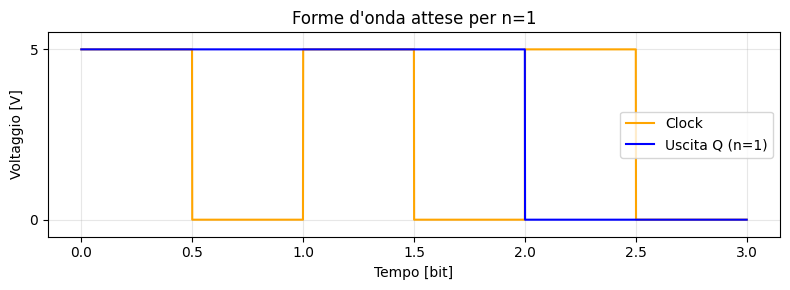

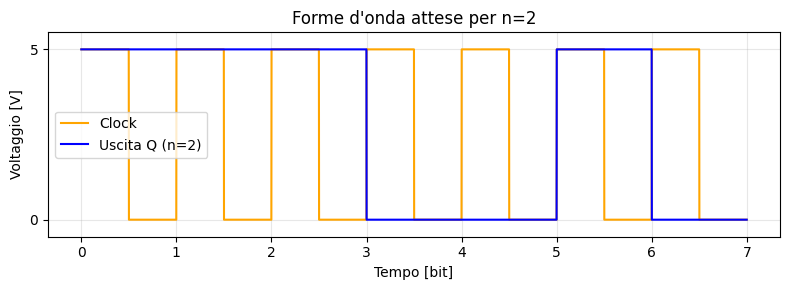

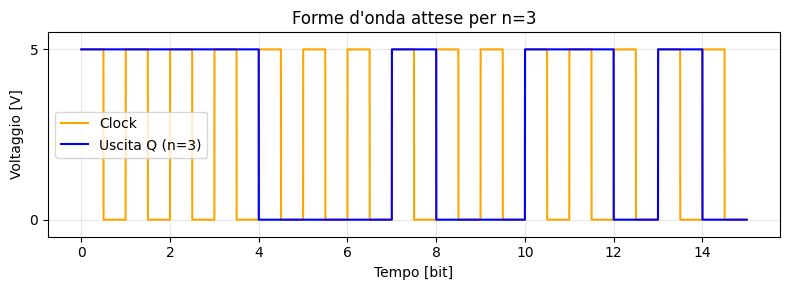

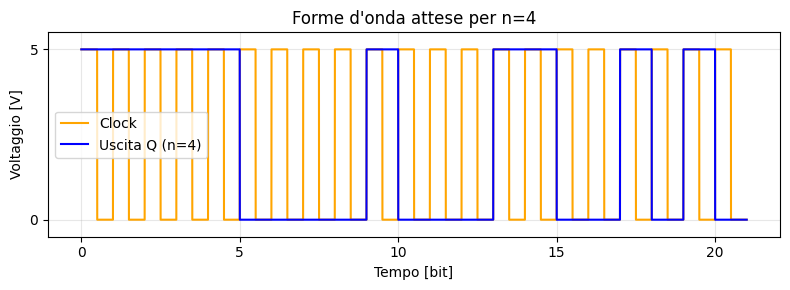

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sequenze attese (OUT = Q del CD4013)
# n = 1, 2, 3, 4  →  m = n+1
seqs = {
    1: "110",                          # periodo 3
    2: "1110010",                      # periodo 7
    3: "111100010011010",              # periodo 15
    4: "111110000100011001010"         # periodo osservato per n=4
}

VLOW, VHIGH = 0.0, 5.0
SAMPLES_PER_BIT = 1000  # punti del vettore tempo che vengono usati per disegnare ogni bit

#creo il segnale in uscita
def bits_to_wave(bits): #Converte una stringa di '0'/'1' in un'onda quadra 0–5 V
    arr = np.array([VHIGH if b == "1" else VLOW for b in bits], dtype=float) #legge ogni carattere della stringa bits,
    #trasformandola in una stringa di 0 e 5
    wave = np.repeat(arr, SAMPLES_PER_BIT) #ciascun valore convertito viene ripetuto SAMPLES_PER_BIT volte nell'array che costruisce la quadra
    t = np.arange(len(wave)) / SAMPLES_PER_BIT  # tempo in unità di bit (ogni SAMPLES_PER_BIT si ha un'unità di tempo)
    return t, wave #mi dà vettore ascisse e ordinate

#creo il clock
def clock_wave(n_bits): #Clock 0–5 V con periodo = 1 bit e duty 50 (quindi in un periodo fa metà basso e metà alto)
    one_bit = np.concatenate([ #crea onda per singolo periodo
        np.full(SAMPLES_PER_BIT - SAMPLES_PER_BIT // 2, VHIGH), #crea k campioni a 5 V
        np.full(SAMPLES_PER_BIT // 2, VLOW), #crea k campioni a 0 V
    ]) 
    clk = np.tile(one_bit, n_bits) #ripete il singolo periodo del clock per il numero di bit che mi serve (in modo da visualizzare l'intera stringa)
    t = np.arange(len(clk)) / SAMPLES_PER_BIT
    return t, clk


# Plot per ogni n
for n, s in seqs.items():
    t_out, y_out = bits_to_wave(s)
    t_clk, y_clk = clock_wave(len(s))

    plt.figure(figsize=(8, 3))
    plt.plot(t_clk, y_clk, label="Clock", color="orange")
    plt.plot(t_out, y_out, label=f"Uscita Q (n={n})", color="blue")
    plt.xlabel("Tempo [bit]")
    plt.ylabel("Voltaggio [V]")
    plt.yticks([0, 5])
    plt.ylim(-0.5, 5.5)
    plt.title(f"Forme d'onda attese per n={n}")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

plt.show()


<img src="attesa_n1.png" alt="forme d'onda attese" width="800"/>

*Figura 22: Forma d'onda attesa per n = 1.*

<img src="attesa_n2.png" alt="forme d'onda attese" width="800"/>

*Figura 23: Forma d'onda attesa per n = 2.*

<img src="attesa_n3.png" alt="forme d'onda attese" width="800"/>

*Figura 24: Forma d'onda attesa per n = 3.*

<img src="attesa_n4.png" alt="forme d'onda attese" width="800"/>

*Figura 25: Forma d'onda attesa per n = 4.*

<img src="attesa_n5.png" alt="forme d'onda attese" width="800"/>

*Figura 26: Forma d'onda attesa per n = 5.*

MARCO INSERISCI

### **Task 8**

<img src="schema_pseudocasuale.png" alt="schema generatore di numeri pseudocasuale" width="800"/>

*Figura 27: Schema circuito generatore di numeri pseudocasuale.*

Obiettivo: 

1. Realizzare il circuito e dimostrare sperimentalmente il funzionamento del generatore configurando inizialmente MC14557 su n=3. Misurare la sequenza di bit pseudocasuale e mostrare che coincide con quella teorica.

2. Ripetere l’operazione per tutti gli n mancanti che vanno da 1 a 5.

Di seguito il circuito realizzato in lab:

<img src="Circuito_realizzato_task8_conCavetto.jpg" alt="circuito in lab con cavo" width="800"/>

*Figura 28: Circuito realizzato in lab, notare la presenza del cavo che collega l'entrata A/A SELECT di MC14557 a terra. Per quanto riguarda il rails, da sinistra verso destra troviamo: alimentazione 5 V, terra, alimentazione 5 V, terra.*

Una volta messo in funzione il circuito, si osserveranno sequenze di bit più o meno facilmente riconducibili a quanto atteso teoricamente (vedi homework 1), per riuscire a capire a che configurazione del circuito corrisponde un dato bit del segnale osservato è bene partire da uno stato ben riconoscibile (a meno che il loop degli stati esplorati dal circuito non sia così breve da poter essere osservato interamente con una singola acquisizione, come è stato anche fatto in seguito, in realtà, per tutte le configurazioni esplorate nel caso presente). Per fare ciò si è seguita la seguente idea: l'ingresso A/B SELECT del MC14557 è stato collegato a W2, al quale è stata fatta generare una quadra sufficientemente lenta, così quando questa occupava il livello alto la memoria del circuito assumeva lo stato con tutti bit 1 dato dall'ingresso A, collegato all'alimentazione a 5 V; quando l'onda di W2 passava al livello basso si ricollegava il ramo di feedback, in quanto MC14557 switchava all'ingresso B ad esso collegato, e tutto il circuito cominciava a cambiare stato iniziando dallo stato con tutti bit 1. Aggiustando la frequenza di W2 in modo che nel suo semiperiodo basso il circuito riesca ad asplorare tutti gli stati del loop finio a tornare a quello di partenza, si riesce a vedere l'intero ciclo senza confondersi.

Di seguito la realizzazione pratica di tale idea:

<img src="Visualizzazione_LED_task8_conW2.jpg" alt="circuito in lab con W2 e LED" width="800"/>

*Figura 29: Circuito realizzato in lab, notare la sostituzione del cavo con il generatore W2 a cui è anche collegato Ch1.I rail sono i medesimi del caso precedente.*

Come ultima osservazione sull'assemblaggio del circuito si nota la presenza del LED, utile per controllare a vista il funzionamento del circuito (che si illuminerà e spegnerà a seconda che il bit in uscita dal flip flop sia 1 o 0, riproducendo il segnale relavoito al loop esplorato dalla memoria del circuito). Nel circuito riportato nellì'immagine sopra tale LED è direttamente collegato all'uscita del flip flop, ma questo abbassa troppo il potenziale, al punto da impedire al segnale logico di superare il livello di soglia 2.5 V dell'integrato e quindi facendo risultare l'uscita sempre bassa.

Per ovviare a tale problema tra LED ed uscita del flip flop è stata inserita una resistenza $R = 680 \Omega$

<img src="Circuito_realizzato_resistenzaLED.jpg" alt="circuito in lab con W2, LED e resistenza" width="800"/>

*Figura 30: Circuito realizzato in lab, notare la resistenza a monte del LED, per non perturbare eccessivamente il circuito logico. I rail sono i medesimi del caso precedente.*

È proprio la presenza di questa resistenza che abbassa il livello alto dell'uscita rispetto ai 5 V attesi teoricamente, in assenza di qualsiasi carico.

Di seguito le osservazioni sperimentali per diverse configurazioni di MC14557.

* 3 bit:

- A/D SELECT collegato a W2: frequenza w2 4Hz e frequenza CLK 120 Hz (in modo che nel semiperiodo basso di w2 riesco a vedere tutte le 15 oscillazioni del CLK necessarie per vedere tutti gli stati del circuito), ch1 su W2 e ch2 su uscita flip flop.

<img src="task8_3bit.png" alt="periodo con 3 bit" width="800"/>

*Figura 31: Ch1 è collegato a W2, mentre il Ch2 è collegato all'uscita del flip flop.*

- A/D SELECT collegato a terra con cavo: frequenza di clock a 5Hz con ch1 sopra e stesso canale 2, questo è stato fatto per vedere bene i cambi di luminosità del LED.

<img src="task8_3bit_wire.png" alt="periodo con 3 bit con cavo" width="800"/>

*Figura 32: Ch1 è collegato a W1 (mostra il segnale di CLK), mentre il Ch2 è collegato all'uscita del flip flop. Il periodo inizia nel tratto alto del segnale misurato dal Ch2 e termina quando questo rinizia.*

Notare come i numeri delle oscillazioni del clock in un periodo corrispondano al numero di stati esplorati dalla memoria del circuito in un intero ciclo (massimale)

Di seguito si riportano le acquisizioni a tutte le altre configurazioni ddel chip MC14557.

* 1 bit:

- A/D SELECT collegato a terra con cavo: stessa frequenza di clock del caso precedente.

<img src="task8_1bit_wire.png" alt="periodo con 1 bit con cavo" width="800"/>

*Figura 33: Ch1 è collegato a W1 (mostra il segnale di CLK), mentre il Ch2 è collegato all'uscita del flip flop.*

Con MC14557 configurato ad 1 bit, l'intero circuito ha una memoria di 2 bit, quindi il segnale non può presentare, per forza di cose, una forma particolarmente variabile.

* 2 bit: 

- A/D SELECT collegato a terra con cavo: stessa frequenza di clock dei due casi precedenti

<img src="task8_2bit_wire.png" alt="periodo con 2 bit con cavo" width="800"/>

*Figura 34: Ch1 è collegato a W1 (mostra il segnale di CLK), mentre il Ch2 è collegato all'uscita del flip flop.*

Nota: per le ultime configurazioni appena trattate si è preferito non collegare A/D SELECT a W2 vista la brevità del periodo del registro (il punto è che anche solo osservando il plot all'oscilloscopio si riesce facilmente ad individuare un certo stato del registro e poi a seguire la successiva evoluzione teorica).

* 4 bit:

- A/D SELECt collegato a terra con cavo: freuqenza del clock 12 Hz (campionato per 2 secondi circa)

<img src="task8_4bit_wire.png" alt="periodo con 4 bit con cavo" width="800"/>

*Figura 35: Ch1 è collegato a W1 (mostra il segnale di CLK), mentre il Ch2 è collegato all'uscita del flip flop.*

- A/D SELECT collegato a W2: frequenza W2 a 1 Hz e frequenza di clock a 42 Hz (così nel semiperiodo in cui A/B SELECT è basso, cioè 0.5 secondi, il circuito riesce ad aggiornare la sua memoria il numero di volte necessario per completare il loop, vedi anche homework 1)

<img src="task8_4bit.png" alt="periodo con 4 bit" width="800"/>

*Figura 36: Ch1 è collegato a W2, mentre il Ch2 è collegato all'uscita del flip flop.*

* 5 bit:

- A/D SELECt collegato a terra con cavo: freuqenza del clock 12 Hz (campionato per 2 secondi circa)

<img src="task8_5bit_wire.png" alt="periodo con 5 bit con cavo" width="800"/>

*Figura 37: Ch1 è collegato a W1 (mostra il segnale di CLK), mentre il Ch2 è collegato all'uscita del flip flop.*

- A/D SELECT collegato a W2: frequenza W2 a 1 Hz e frequenza di clock a 42 Hz (così nel semiperiodo in cui A/B SELECT è basso, cioè 0.5 secondi, il circuito riesce ad aggiornare la sua memoria il numero di volte necessario per completare il loop, vedi anche homework 1)

<img src="task8_5bit.png" alt="periodo con 5 bit" width="800"/>

*Figura 38: Ch1 è collegato a W2, mentre il Ch2 è collegato all'uscita del flip flop.*